In [1]:
import tensorflow.keras as keras
import tensorflow.keras.backend as K
import os
import shutil
import numpy as np
keras.__version__

'2.7.0'

## Functional API Example
How we are going to show how to use the Functional API in keras. First we will borrow the cats and dogs datasets from kaggle. This is a small dataset of either cat or dog images. The point was to differentiate between cats and dogs. At the time of release this was hard, that is no longer true. 

As a preprocessing step we have already separated the images into train, valid, and test split folders. Each folder has a sub folder for cat or dog. This will make it easy to use the keras built in `ImageDataGenerator` and the `flow_from_directory` function.

In [2]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

train_images = train_images.astype('float32') / 255

test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

train_images.shape, train_labels.shape

((50000, 32, 32, 3), (50000, 10))

Set variables for training

In [3]:
epochss = 10

# Sequential Model
Next we will make a model to train with this dataset using the old Sequential API like the example did.

In [4]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=train_images.shape[1:]))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(train_labels.shape[-1], activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

history1 = model.fit(
    x=train_images,
    y=train_labels,
    epochs=epochss,
    validation_split=0.7)

Epoch 1/10
469/469 [==============================] - 7s 9ms/step - loss: 2.1850 - acc: 0.1951 - val_loss: 2.0502 - val_acc: 0.2353
Epoch 2/10
469/469 [==============================] - 3s 7ms/step - loss: 1.9634 - acc: 0.2759 - val_loss: 1.8969 - val_acc: 0.2821
Epoch 3/10
469/469 [==============================] - 3s 7ms/step - loss: 1.8508 - acc: 0.3146 - val_loss: 1.8505 - val_acc: 0.3173
Epoch 4/10
469/469 [==============================] - 3s 7ms/step - loss: 1.7826 - acc: 0.3373 - val_loss: 1.7591 - val_acc: 0.3567
Epoch 5/10
469/469 [==============================] - 3s 7ms/step - loss: 1.7352 - acc: 0.3569 - val_loss: 1.7146 - val_acc: 0.3664
Epoch 6/10
469/469 [==============================] - 4s 7ms/step - loss: 1.6944 - acc: 0.3765 - val_loss: 1.7091 - val_acc: 0.3638
Epoch 7/10
469/469 [==============================] - 3s 7ms/step - loss: 1.6572 - acc: 0.3898 - val_loss: 1.6822 - val_acc: 0.3813
Epoch 8/10
469/469 [==============================] - 3s 7ms/step - loss: 1.

And lets plot our performance

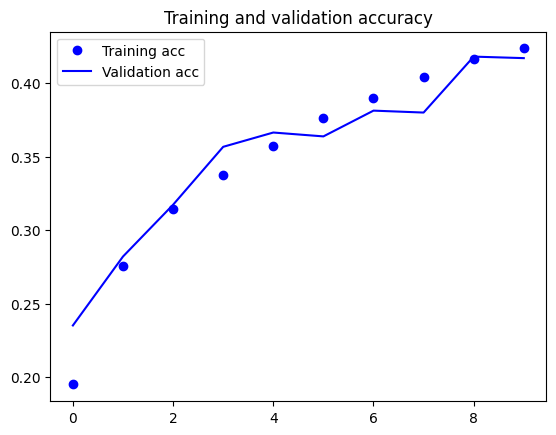

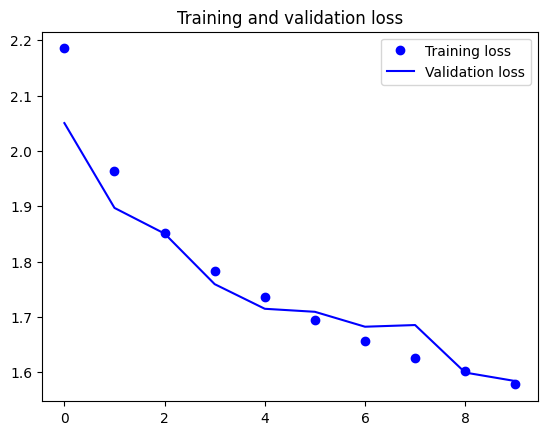

In [5]:
import matplotlib.pyplot as plt

acc = history1.history['acc']
val_acc = history1.history['val_acc']
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Functional API Model
Now I want to do the same exact model only with the Functional API

In [6]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import TensorBoard

K.clear_session()

input_tensor = Input(shape=train_images.shape[1:])

last_output_tensor = input_tensor

last_output_tensor = Conv2D(32, (3, 3), activation='relu')(last_output_tensor)
last_output_tensor = MaxPooling2D((2, 2))(last_output_tensor)
last_output_tensor = Conv2D(64, (3, 3), activation='relu')(last_output_tensor)
last_output_tensor = MaxPooling2D((2, 2))(last_output_tensor)
last_output_tensor = Conv2D(128, (3, 3), activation='relu')(last_output_tensor)
last_output_tensor = MaxPooling2D((2, 2))(last_output_tensor)
last_output_tensor = GlobalAveragePooling2D()(last_output_tensor)
last_output_tensor = Dense(64, activation='relu')(last_output_tensor)
last_output_tensor = Dense(train_labels.shape[-1], activation='softmax')(last_output_tensor)

model = models.Model(inputs = [input_tensor], outputs = [last_output_tensor])


model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

shutil.rmtree('./logs') if os.path.exists('./logs') else None
callbacks = [TensorBoard(log_dir='./logs',
                         histogram_freq=1,
                         write_graph=True, 
                         write_grads=False, 
                         write_images=True, 
                         embeddings_freq=0,
                         embeddings_layer_names=None, 
                         embeddings_metadata=None,
                         embeddings_data=None, 
                         update_freq='epoch')]


history = model.fit(
    x=train_images,
    y=train_labels,
    epochs=epochss,
    validation_split=0.7,
    callbacks=callbacks)

Epoch 1/10
469/469 [==============================] - 5s 10ms/step - loss: 2.2160 - acc: 0.1791 - val_loss: 2.1095 - val_acc: 0.2379
Epoch 2/10
469/469 [==============================] - 3s 7ms/step - loss: 2.0188 - acc: 0.2633 - val_loss: 1.9525 - val_acc: 0.2862
Epoch 3/10
469/469 [==============================] - 4s 8ms/step - loss: 1.9074 - acc: 0.3059 - val_loss: 1.8972 - val_acc: 0.3011
Epoch 4/10
469/469 [==============================] - 4s 8ms/step - loss: 1.8417 - acc: 0.3279 - val_loss: 1.8483 - val_acc: 0.3182
Epoch 5/10
469/469 [==============================] - 4s 8ms/step - loss: 1.7864 - acc: 0.3429 - val_loss: 1.7696 - val_acc: 0.3530
Epoch 6/10
469/469 [==============================] - 4s 8ms/step - loss: 1.7381 - acc: 0.3697 - val_loss: 1.7691 - val_acc: 0.3508
Epoch 7/10
469/469 [==============================] - 4s 8ms/step - loss: 1.6947 - acc: 0.3852 - val_loss: 1.6900 - val_acc: 0.3807
Epoch 8/10
469/469 [==============================] - 3s 7ms/step - loss: 1

As before lets plot our performance

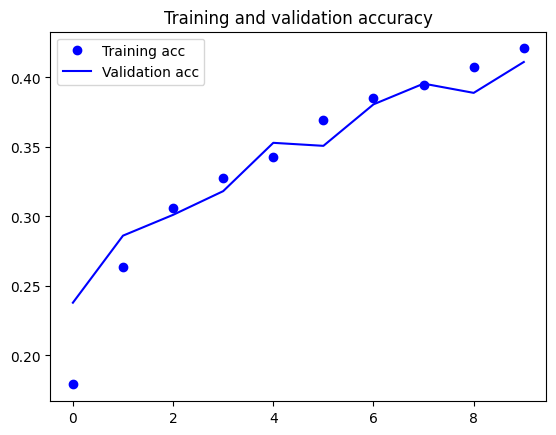

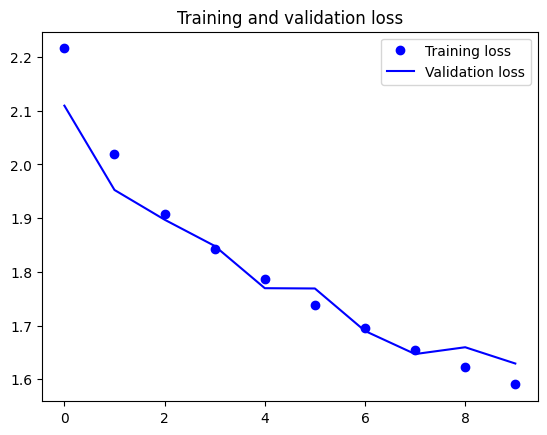

In [7]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Residual Network with Functional API
Ok so at this point you may be like "but I can do all that with the `Sequential` model and everyone on the internet loves it so why should I ever use the functional API?"

First people on the internet can be very helpful, but they can also be WRONG

The Functional API allows us to make models that the sequential model just cannot handle. For example the code below does an advanced technique to make a residual network.

In [8]:
from tensorflow.keras.layers import Add, Cropping2D

K.clear_session()

input_tensor = Input(train_images.shape[1:])

last_output_tensor = input_tensor

last_output_tensor = Conv2D(32, (3, 3), activation='relu')(last_output_tensor)
last_output_tensor = MaxPooling2D((2, 2))(last_output_tensor)

# HERE I make another tensor called a residual tensor. However look that I keep using the last_output_tensor
# in the next lines
residual_tensor = last_output_tensor
last_output_tensor = Conv2D(64, (3, 3), activation='relu')(last_output_tensor)
last_output_tensor = MaxPooling2D((2, 2))(last_output_tensor)
last_output_tensor = Conv2D(128, (3, 3), activation='relu')(last_output_tensor)
last_output_tensor = MaxPooling2D((2, 2))(last_output_tensor)

# Now I start working with the residual tensor and mainly I am reshaping it to fit
# the same size as last_output_tensor that was just created
residual_tensor = Conv2D(filters=128, kernel_size=(1, 1), strides=(1, 1))(residual_tensor)
residual_tensor = MaxPooling2D((4, 4))(residual_tensor)
residual_tensor = Cropping2D((1,1))(residual_tensor)

# This is the fancy part where I add the output tensors from the last two sections
last_output_tensor = Add()([last_output_tensor, residual_tensor])

last_output_tensor = GlobalAveragePooling2D()(last_output_tensor)
last_output_tensor = Dense(64, activation='relu')(last_output_tensor)
last_output_tensor = Dense(train_labels.shape[-1], activation='sigmoid')(last_output_tensor)

residual_model = models.Model(inputs = [input_tensor], outputs = [last_output_tensor])


residual_model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

shutil.rmtree('./logs_residual') if os.path.exists('./logs_residual') else None
callbacks = [TensorBoard(log_dir='./logs_residual',
                         histogram_freq=1, 
                         write_graph=True, 
                         write_grads=False, 
                         write_images=True, 
                         embeddings_freq=0,
                         embeddings_layer_names=None, 
                         embeddings_metadata=None,
                         embeddings_data=None, 
                         update_freq='epoch')]

history = residual_model.fit(
    x=train_images,
    y=train_labels,
    epochs=epochss,
    validation_split=0.7,
    callbacks=callbacks)

/usr/local/lib/python3.8/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


Epoch 1/10
469/469 [==============================] - 5s 10ms/step - loss: 0.3433 - acc: 0.1613 - val_loss: 0.3139 - val_acc: 0.2188
Epoch 2/10
469/469 [==============================] - 4s 8ms/step - loss: 0.3042 - acc: 0.2360 - val_loss: 0.2979 - val_acc: 0.2585
Epoch 3/10
469/469 [==============================] - 4s 8ms/step - loss: 0.2927 - acc: 0.2703 - val_loss: 0.2882 - val_acc: 0.2843
Epoch 4/10
469/469 [==============================] - 4s 8ms/step - loss: 0.2855 - acc: 0.2926 - val_loss: 0.2823 - val_acc: 0.2992
Epoch 5/10
469/469 [==============================] - 4s 8ms/step - loss: 0.2792 - acc: 0.3132 - val_loss: 0.2799 - val_acc: 0.3111
Epoch 6/10
469/469 [==============================] - 4s 8ms/step - loss: 0.2740 - acc: 0.3385 - val_loss: 0.2719 - val_acc: 0.3277
Epoch 7/10
469/469 [==============================] - 4s 9ms/step - loss: 0.2692 - acc: 0.3509 - val_loss: 0.2692 - val_acc: 0.3359
Epoch 8/10
469/469 [==============================] - 4s 9ms/step - loss: 0

Once again plot the performance

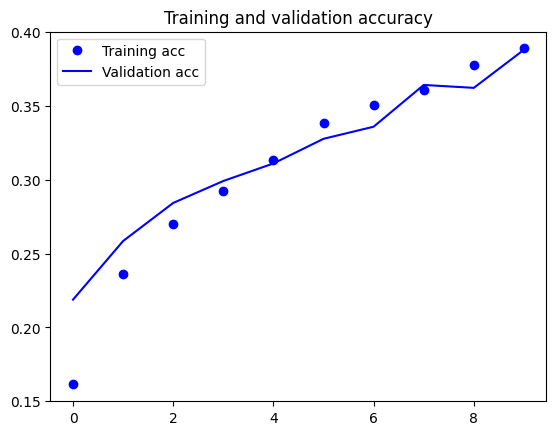

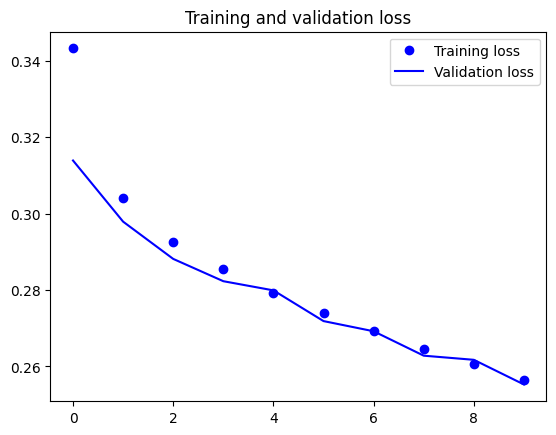

In [9]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Plot Models
To reiterate I will show the two different models that were made

In [10]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856 

In [11]:
residual_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 30, 30, 32)   896         ['input_1[0][0]']                
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 15, 15, 32)   0           ['conv2d[0][0]']                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 13, 13, 64)   18496       ['max_pooling2d[0][0]']          
                                                                                              

So that isn't really helpful in text. How about a real picture?

In [12]:
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot

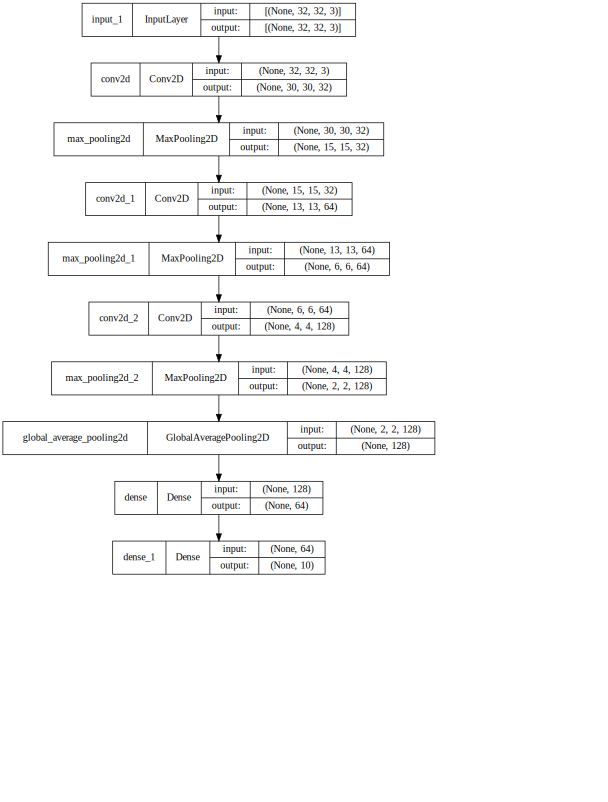

In [13]:
SVG(model_to_dot(model, show_shapes=True, dpi=100).create(prog='dot', format='svg'))

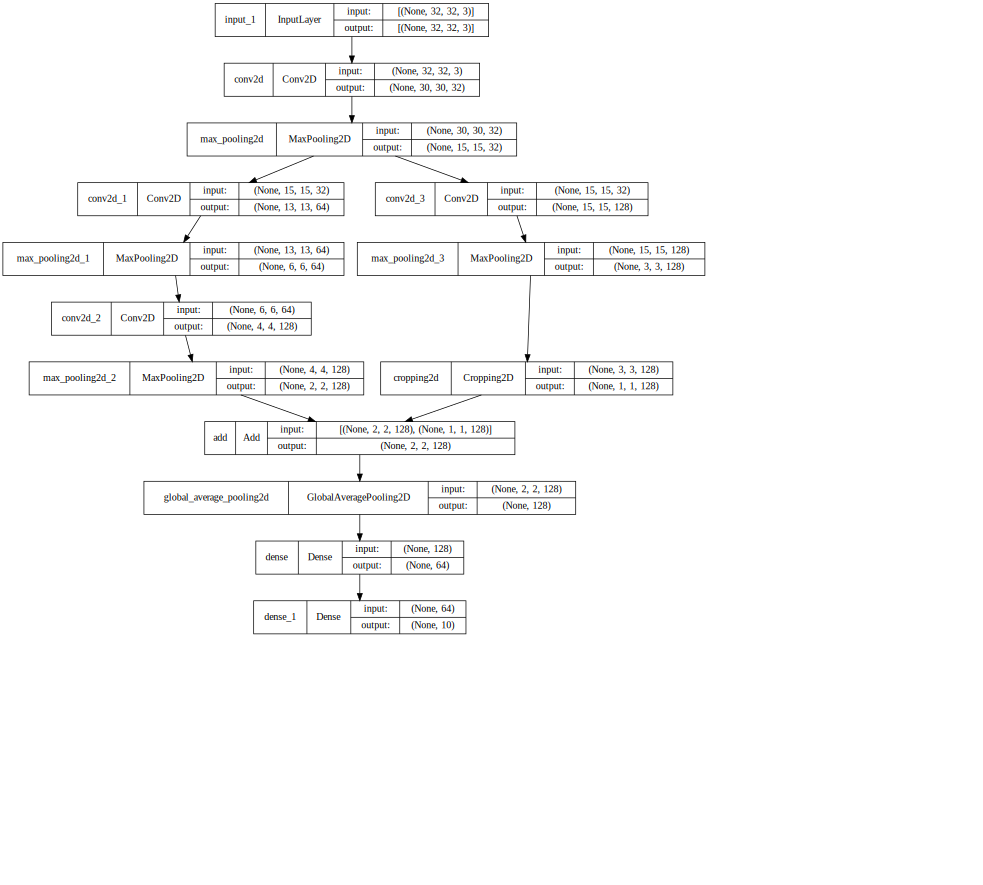

In [14]:
SVG(model_to_dot(residual_model, show_shapes=True, dpi=100).create(prog='dot', format='svg'))

# Tensorboard
The residual network example made some tensorboard logs including the network model.

In [15]:
%load_ext tensorboard

In [16]:
%tensorboard --bind_all --logdir logs

In [17]:
%tensorboard --bind_all --logdir logs_residual

# TQDM Callback

In [19]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tqdm.keras import TqdmCallback

K.clear_session()

input_tensor = Input(shape=train_images.shape[1:])

last_output_tensor = input_tensor

last_output_tensor = Conv2D(32, (3, 3), activation='relu')(last_output_tensor)
last_output_tensor = MaxPooling2D((2, 2))(last_output_tensor)
last_output_tensor = Conv2D(64, (3, 3), activation='relu')(last_output_tensor)
last_output_tensor = MaxPooling2D((2, 2))(last_output_tensor)
last_output_tensor = Conv2D(128, (3, 3), activation='relu')(last_output_tensor)
last_output_tensor = MaxPooling2D((2, 2))(last_output_tensor)
last_output_tensor = GlobalAveragePooling2D()(last_output_tensor)
last_output_tensor = Dense(64, activation='relu')(last_output_tensor)
last_output_tensor = Dense(train_labels.shape[-1], activation='softmax')(last_output_tensor)

model = models.Model(inputs = [input_tensor], outputs = [last_output_tensor])


model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

validation_split=0.7
num_samples = train_images.shape[0] * validation_split
batch_size = 32
callbacks = [TqdmCallback(epochs=epochss, data_size=num_samples, batch_size=batch_size)]


history = model.fit(
    x=train_images,
    y=train_labels,
    batch_size=batch_size,
    epochs=epochss,
    validation_split=validation_split,
    callbacks=callbacks,
    verbose=0)

  0%|          | 0/10 [00:00<?, ?epoch/s]

  0%|          | 0/1094.0 [00:00<?, ?batch/s]